In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df20_props_s = pd.read_csv('AC20_solid_region_props.txt', sep = '\t')
df80_props_s = pd.read_csv('AC80_solid_region_props.txt', sep = '\t')
df20_props_p = pd.read_csv('AC20_pores_region_props.txt', sep = '\t')
df80_props_p = pd.read_csv('AC80_pores_region_props.txt', sep = '\t')

df20_thick_s = pd.read_csv('AC20_solid_localthick_psd.txt', sep = '\t')
df80_thick_s = pd.read_csv('AC80_solid_localthick_psd.txt', sep = '\t')
df20_thick_p = pd.read_csv('AC20_pores_localthick_psd.txt', sep = '\t')
df80_thick_p = pd.read_csv('AC80_pores_localthick_psd.txt', sep = '\t')

In [3]:
df20_props_p.head(2)

,label,volume,bbox_volume,sphericity,surface_area,convex_volume,num_pixels,area,area_bbox,area_convex,equivalent_diameter_area,euler_number,extent,feret_diameter_max,area_filled,axis_major_length,axis_minor_length,solidity
0,1,195.0,540,0.724230,224.541870,284.0,195,195.0,540.0,284.0,7.194689,1,0.361111,15.652476,195.0,15.782888,3.194905,0.686620
1,2,474.0,1029,0.992453,296.228302,617.0,474,474.0,1029.0,617.0,9.673714,1,0.460641,21.679483,474.0,23.730137,5.987385,0.768233


In [4]:
df20_thick_s.head(2)

,LogR,pdf,cdf,satn,bin_centers,bin_widths
0,0.177105,0.510628,1.000000,0.051063,0.177105,0.1
1,0.277105,0.258163,0.948937,0.025816,0.277105,0.1


In [5]:
voxel_size = 1.34 #microns

### Region Props

In [6]:
diam_AC20 = np.mean(df20_props_p['equivalent_diameter_area']*voxel_size)
diam_std_AC20 = np.std(df20_props_p['equivalent_diameter_area']*voxel_size)
diam_med_AC20 = np.median(df20_props_p['equivalent_diameter_area']*voxel_size)

diam_AC80 = np.mean(df80_props_p['equivalent_diameter_area']*voxel_size)
diam_std_AC80 = np.std(df80_props_p['equivalent_diameter_area']*voxel_size)
diam_med_AC80 = np.median(df80_props_p['equivalent_diameter_area']*voxel_size)

vol_AC20 = np.mean(df20_props_p['volume']*(voxel_size**3))
vol_std_AC20 = np.std(df20_props_p['volume']*(voxel_size**3))
vol_med_AC20 = np.median(df20_props_p['volume']*(voxel_size**3))

vol_AC80 = np.mean(df80_props_p['volume']*(voxel_size**3))
vol_std_AC80 = np.std(df80_props_p['volume']*(voxel_size**3))
vol_med_AC80 = np.median(df80_props_p['volume']*(voxel_size**3))

In [7]:
bar_width0 = 3
x0_min = min(np.concatenate([df20_props_p['equivalent_diameter_area'].to_numpy()*voxel_size,df80_props_p['equivalent_diameter_area'].to_numpy()*voxel_size]))
x0_max = max(np.concatenate([df20_props_p['equivalent_diameter_area'].to_numpy()*voxel_size,df80_props_p['equivalent_diameter_area'].to_numpy()*voxel_size]))
bins0= np.arange(x0_min, x0_max + bar_width0, bar_width0)

bar_width1 = 3000 
x1_min = min(np.concatenate([df20_props_p['volume'].to_numpy()*(voxel_size**3),df80_props_p['volume'].to_numpy()*(voxel_size**3)]))
x1_max = max(np.concatenate([df20_props_p['volume'].to_numpy()*(voxel_size**3),df80_props_p['volume'].to_numpy()*(voxel_size**3)]))
bins1 = np.arange(x1_min, x1_max + bar_width1, bar_width1)

In [8]:
print("max(AC20):", round(max(df20_props_p['volume'].to_numpy()*(voxel_size**3)),4))
print("max(AC80):", round(max(df80_props_p['volume'].to_numpy()*(voxel_size**3)),4))

max(AC20): 1796154.2299
max(AC80): 4599448.2538


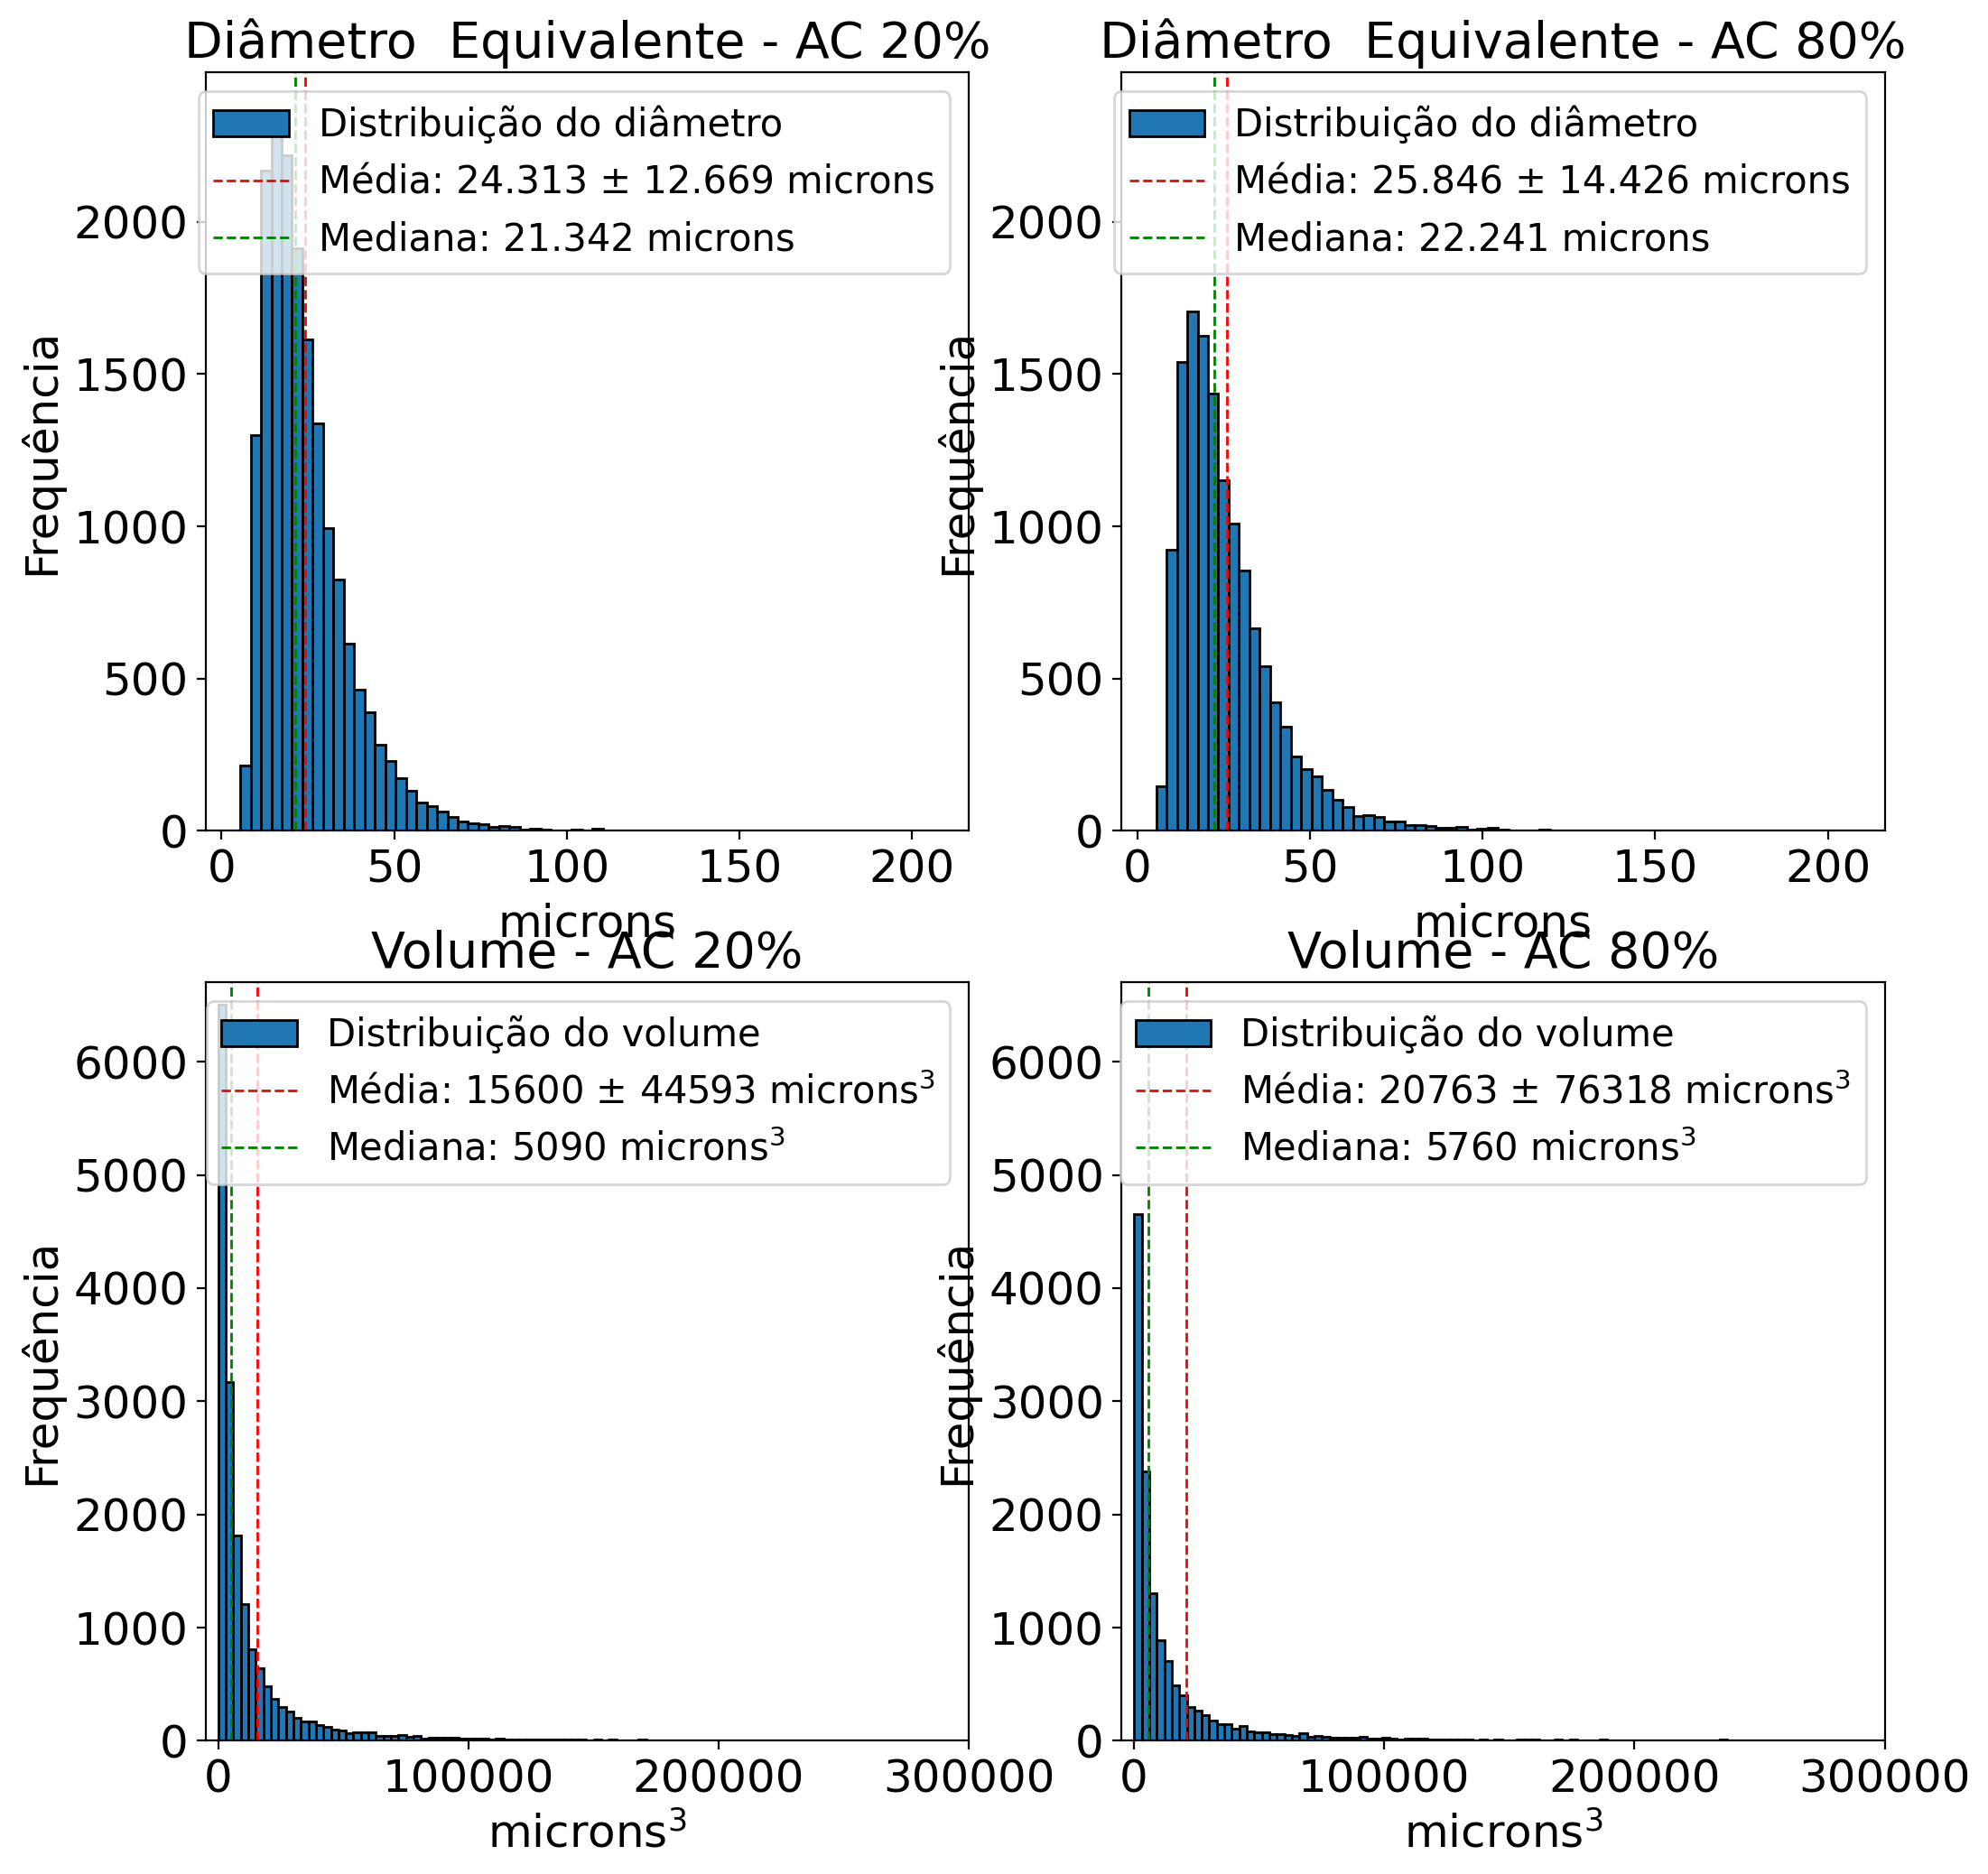

In [9]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), dpi=200)
ax[0,0].hist(df20_props_p['equivalent_diameter_area']*voxel_size, edgecolor="k", bins=bins0, label = "Distribuição do diâmetro")
ax[0,0].axvline(diam_AC20, color='red', linestyle='--', linewidth=1, label = f"Média: {round(diam_AC20,3)} ± {round(diam_std_AC20, 3)} microns")
ax[0,0].axvline(diam_med_AC20, color='green', linestyle='--', linewidth=1, label = f"Mediana: {round(diam_med_AC20,3)} microns")
#ax[0,0].axvspan(diam_AC20 - diam_std_AC20, diam_AC20 + diam_std_AC20, color='red',alpha=0.2)
ax[0,0].set_xlabel("microns", fontsize = 18)
ax[0,0].set_ylabel("Frequência", fontsize = 18)
ax[0,0].tick_params(axis='x', labelsize=18)
ax[0,0].tick_params(axis='y', labelsize=18)
ax[0,0].set_title("Diâmetro  Equivalente - AC 20%", fontsize = 20)
ax[0,1].hist(df80_props_p['equivalent_diameter_area']*voxel_size, edgecolor="k", bins=bins0, label = "Distribuição do diâmetro")
ax[0,1].axvline(diam_AC80, color='red', linestyle='--', linewidth=1, label = f"Média: {round(diam_AC80,3)} ± {round(diam_std_AC80, 3)} microns")
ax[0,1].axvline(diam_med_AC80, color='green', linestyle='--', linewidth=1, label = f"Mediana: {round(diam_med_AC80,3)} microns")
#ax[0,1].axvspan(diam_AC80 - diam_std_AC80, diam_AC80 + diam_std_AC80, color='red',alpha=0.2)
ax[0,1].set_xlabel("microns", fontsize = 18)
ax[0,1].set_ylabel("Frequência", fontsize = 18)
ax[0,1].tick_params(axis='x', labelsize=18)
ax[0,1].tick_params(axis='y', labelsize=18)
ax[0,1].set_title("Diâmetro  Equivalente - AC 80%", fontsize = 20)
ax[0,0].set_ylim(0, 2490); ax[0,1].set_ylim(0, 2490)

ax[1,0].hist(df20_props_p['volume']*(voxel_size**3), edgecolor="k", bins=bins1, label = "Distribuição do volume")
ax[1,0].axvline(vol_AC20, color='red', linestyle='--', linewidth=1, label = fr"Média: {round(vol_AC20)} ± {round(vol_std_AC20)} microns$^3$")
ax[1,0].axvline(vol_med_AC20, color='green', linestyle='--', linewidth=1, label = fr"Mediana: {round(vol_med_AC20)} microns$^3$")
#ax[1,0].axvspan(vol_AC20 - vol_std_AC20, vol_AC20 + vol_std_AC20, color='red',alpha=0.2)
ax[1,0].set_xlabel(r"microns$^3$", fontsize = 18)
ax[1,0].set_ylabel("Frequência", fontsize = 18)
ax[1,0].tick_params(axis='x', labelsize=18)
ax[1,0].tick_params(axis='y', labelsize=18)
ax[1,0].set_title("Volume - AC 20%", fontsize = 20)
ax[1,1].hist(df80_props_p['volume']*(voxel_size**3), edgecolor="k", bins=bins1, label = "Distribuição do volume")
ax[1,1].axvline(vol_AC80, color='red', linestyle='--', linewidth=1, label = fr"Média: {round(vol_AC80)} ± {round(vol_std_AC80)} microns$^3$")
ax[1,1].axvline(vol_med_AC80, color='green', linestyle='--', linewidth=1, label = fr"Mediana: {round(vol_med_AC80)} microns$^3$")
#ax[1,1].axvspan(vol_AC80 - vol_std_AC80, vol_AC80 + vol_std_AC80, color='red',alpha=0.2)
ax[1,1].set_xlabel(r"microns$^3$", fontsize = 18)
ax[1,1].set_ylabel("Frequência", fontsize = 18)
ax[1,1].tick_params(axis='x', labelsize=18)
ax[1,1].tick_params(axis='y', labelsize=18)
ax[1,1].set_title("Volume - AC 80%", fontsize = 20)
ax[1,0].set_xlim(-5000, 300000); ax[1,1].set_xlim(-5000, 300000)
ax[1,0].set_ylim(0, 6700); ax[1,1].set_ylim(0, 6700);

ax[0,0].legend(fontsize = 15);ax[0,1].legend(fontsize = 15);ax[1,0].legend(fontsize = 15);ax[1,1].legend(fontsize = 15);
fig.savefig("AC_region_props.png")

### Local thickness 

In [10]:
df20_thick_s["R"] = 10**df20_thick_s["LogR"]
df80_thick_s["R"] = 10**df80_thick_s["LogR"]

thk_AC20 = np.average(df20_thick_s["R"], weights=df20_thick_s["satn"])
thk_std_AC20 = np.sqrt(np.average((df20_thick_s["R"] - thk_AC20)**2, weights=df20_thick_s["satn"]))
thk_log_AC20 = np.log10(thk_AC20)

thk_AC80 = np.average(df80_thick_s["R"], weights=df80_thick_s["satn"])
thk_std_AC80 = np.sqrt(np.average((df80_thick_s["R"] - thk_AC80)**2, weights=df80_thick_s["satn"]))
thk_log_AC80 = np.log10(thk_AC80)

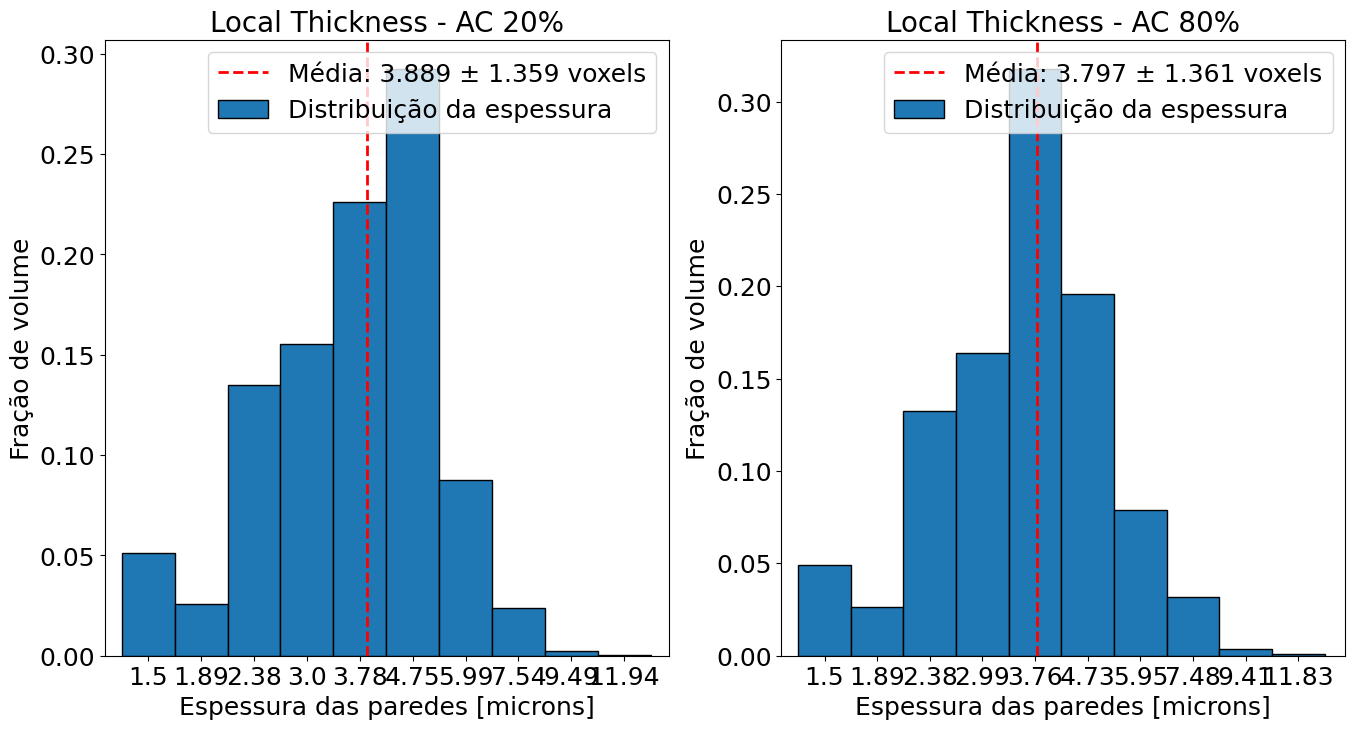

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[16, 8])
ax[0].set_xticks(df20_thick_s['LogR'])
ax[0].set_xticklabels(df20_thick_s['R'].round(1), fontsize = 18)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].set_title("Local Thickness - AC 20%", fontsize = 20)
ax[0].set_xlabel('Espessura das paredes [microns]', fontsize = 18)
ax[0].set_ylabel('Fração de volume', fontsize = 18)
ax[0].set_xlim(np.log(1.1), np.log10(14.5))
#ax[0].set_ylim(0, 3.05)
ax[0].bar(x=df20_thick_s['LogR'], height=df20_thick_s["satn"], width=df20_thick_s.bin_widths, edgecolor='k', label="Distribuição da espessura")
ax[0].axvline(thk_log_AC20, color='red', linestyle='--', linewidth=2, label = f"Média: {round(thk_AC20,3)} ± {round(thk_std_AC20, 3)} voxels")
# ax[0].axvspan(mean20_log - std20_log, mean20_log + std20_log, color='red',alpha=0.2)
ax[0].legend(fontsize = 18);
ax[1].set_xticks(df80_thick_s['LogR'])
ax[1].set_xticklabels(df80_thick_s['R'].round(1), fontsize = 18)
ax[1].tick_params(axis='y', labelsize=18)
ax[1].set_title("Local Thickness - AC 80%", fontsize = 20)
ax[1].set_xlabel('Espessura das paredes [microns]', fontsize = 18)
ax[1].set_ylabel('Fração de volume', fontsize = 18)
ax[1].set_xlim(np.log(1.1), np.log10(14.5))
#ax[1].set_ylim(0, 3.05)
ax[1].bar(x=df80_thick_s['LogR'], height=df80_thick_s["satn"], width=df80_thick_s.bin_widths, edgecolor='k', label="Distribuição da espessura")
ax[1].axvline(thk_log_AC80, color='red', linestyle='--', linewidth=2, label = f"Média: {round(thk_AC80,3)} ± {round(thk_std_AC80, 3)} voxels")
# ax[1].axvspan(mean80_log - std80_log, mean80_log + std80_log, color='red',alpha=0.2)
ax[1].legend(fontsize = 18);

fig.savefig("AC_local_thick.png")

## Aniônica

In [12]:
df20_props_pA = pd.read_csv('A20_poros_regionprops.txt', sep = '\t')
df80_props_pA = pd.read_csv('A80_poros_regionprops.txt', sep = '\t')

In [13]:
bar_width0 = 3
x0_min = min(np.concatenate([df20_props_pA['equivalent_diameter_area'].to_numpy()*voxel_size,df80_props_pA['equivalent_diameter_area'].to_numpy()*voxel_size]))
x0_max = max(np.concatenate([df20_props_pA['equivalent_diameter_area'].to_numpy()*voxel_size,df80_props_pA['equivalent_diameter_area'].to_numpy()*voxel_size]))
bins0= np.arange(x0_min, x0_max + bar_width0, bar_width0)

bar_width1 = 3000 
x1_min = min(np.concatenate([df20_props_pA['volume'].to_numpy()*(voxel_size**3),df80_props_pA['volume'].to_numpy()*(voxel_size**3)]))
x1_max = max(np.concatenate([df20_props_pA['volume'].to_numpy()*(voxel_size**3),df80_props_pA['volume'].to_numpy()*(voxel_size**3)]))
bins1 = np.arange(x1_min, x1_max + bar_width1, bar_width1)


In [14]:
diam_A20 = np.mean(df20_props_pA['equivalent_diameter_area']*voxel_size)
diam_std_A20 = np.std(df20_props_pA['equivalent_diameter_area']*voxel_size)
diam_med_A20 = np.median(df20_props_pA['equivalent_diameter_area']*voxel_size)

diam_A80 = np.mean(df80_props_pA['equivalent_diameter_area']*voxel_size)
diam_std_A80 = np.std(df80_props_pA['equivalent_diameter_area']*voxel_size)
diam_med_A80 = np.median(df80_props_pA['equivalent_diameter_area']*voxel_size)

vol_A20 = np.mean(df20_props_pA['volume']*(voxel_size**3))
vol_std_A20 = np.std(df20_props_pA['volume']*(voxel_size**3))
vol_med_A20 = np.median(df20_props_pA['volume']*(voxel_size**3))

vol_A80 = np.mean(df80_props_pA['volume']*(voxel_size**3))
vol_std_A80 = np.std(df80_props_pA['volume']*(voxel_size**3))
vol_med_A80 = np.median(df80_props_pA['volume']*(voxel_size**3))

In [15]:
print("max(A20):", round(max(df20_props_pA['volume'].to_numpy()*(voxel_size**3)),4))
print("max(A80):", round(max(df80_props_pA['volume'].to_numpy()*(voxel_size**3)),4))

max(A20): 5389242.2674
max(A80): 4898510.1383


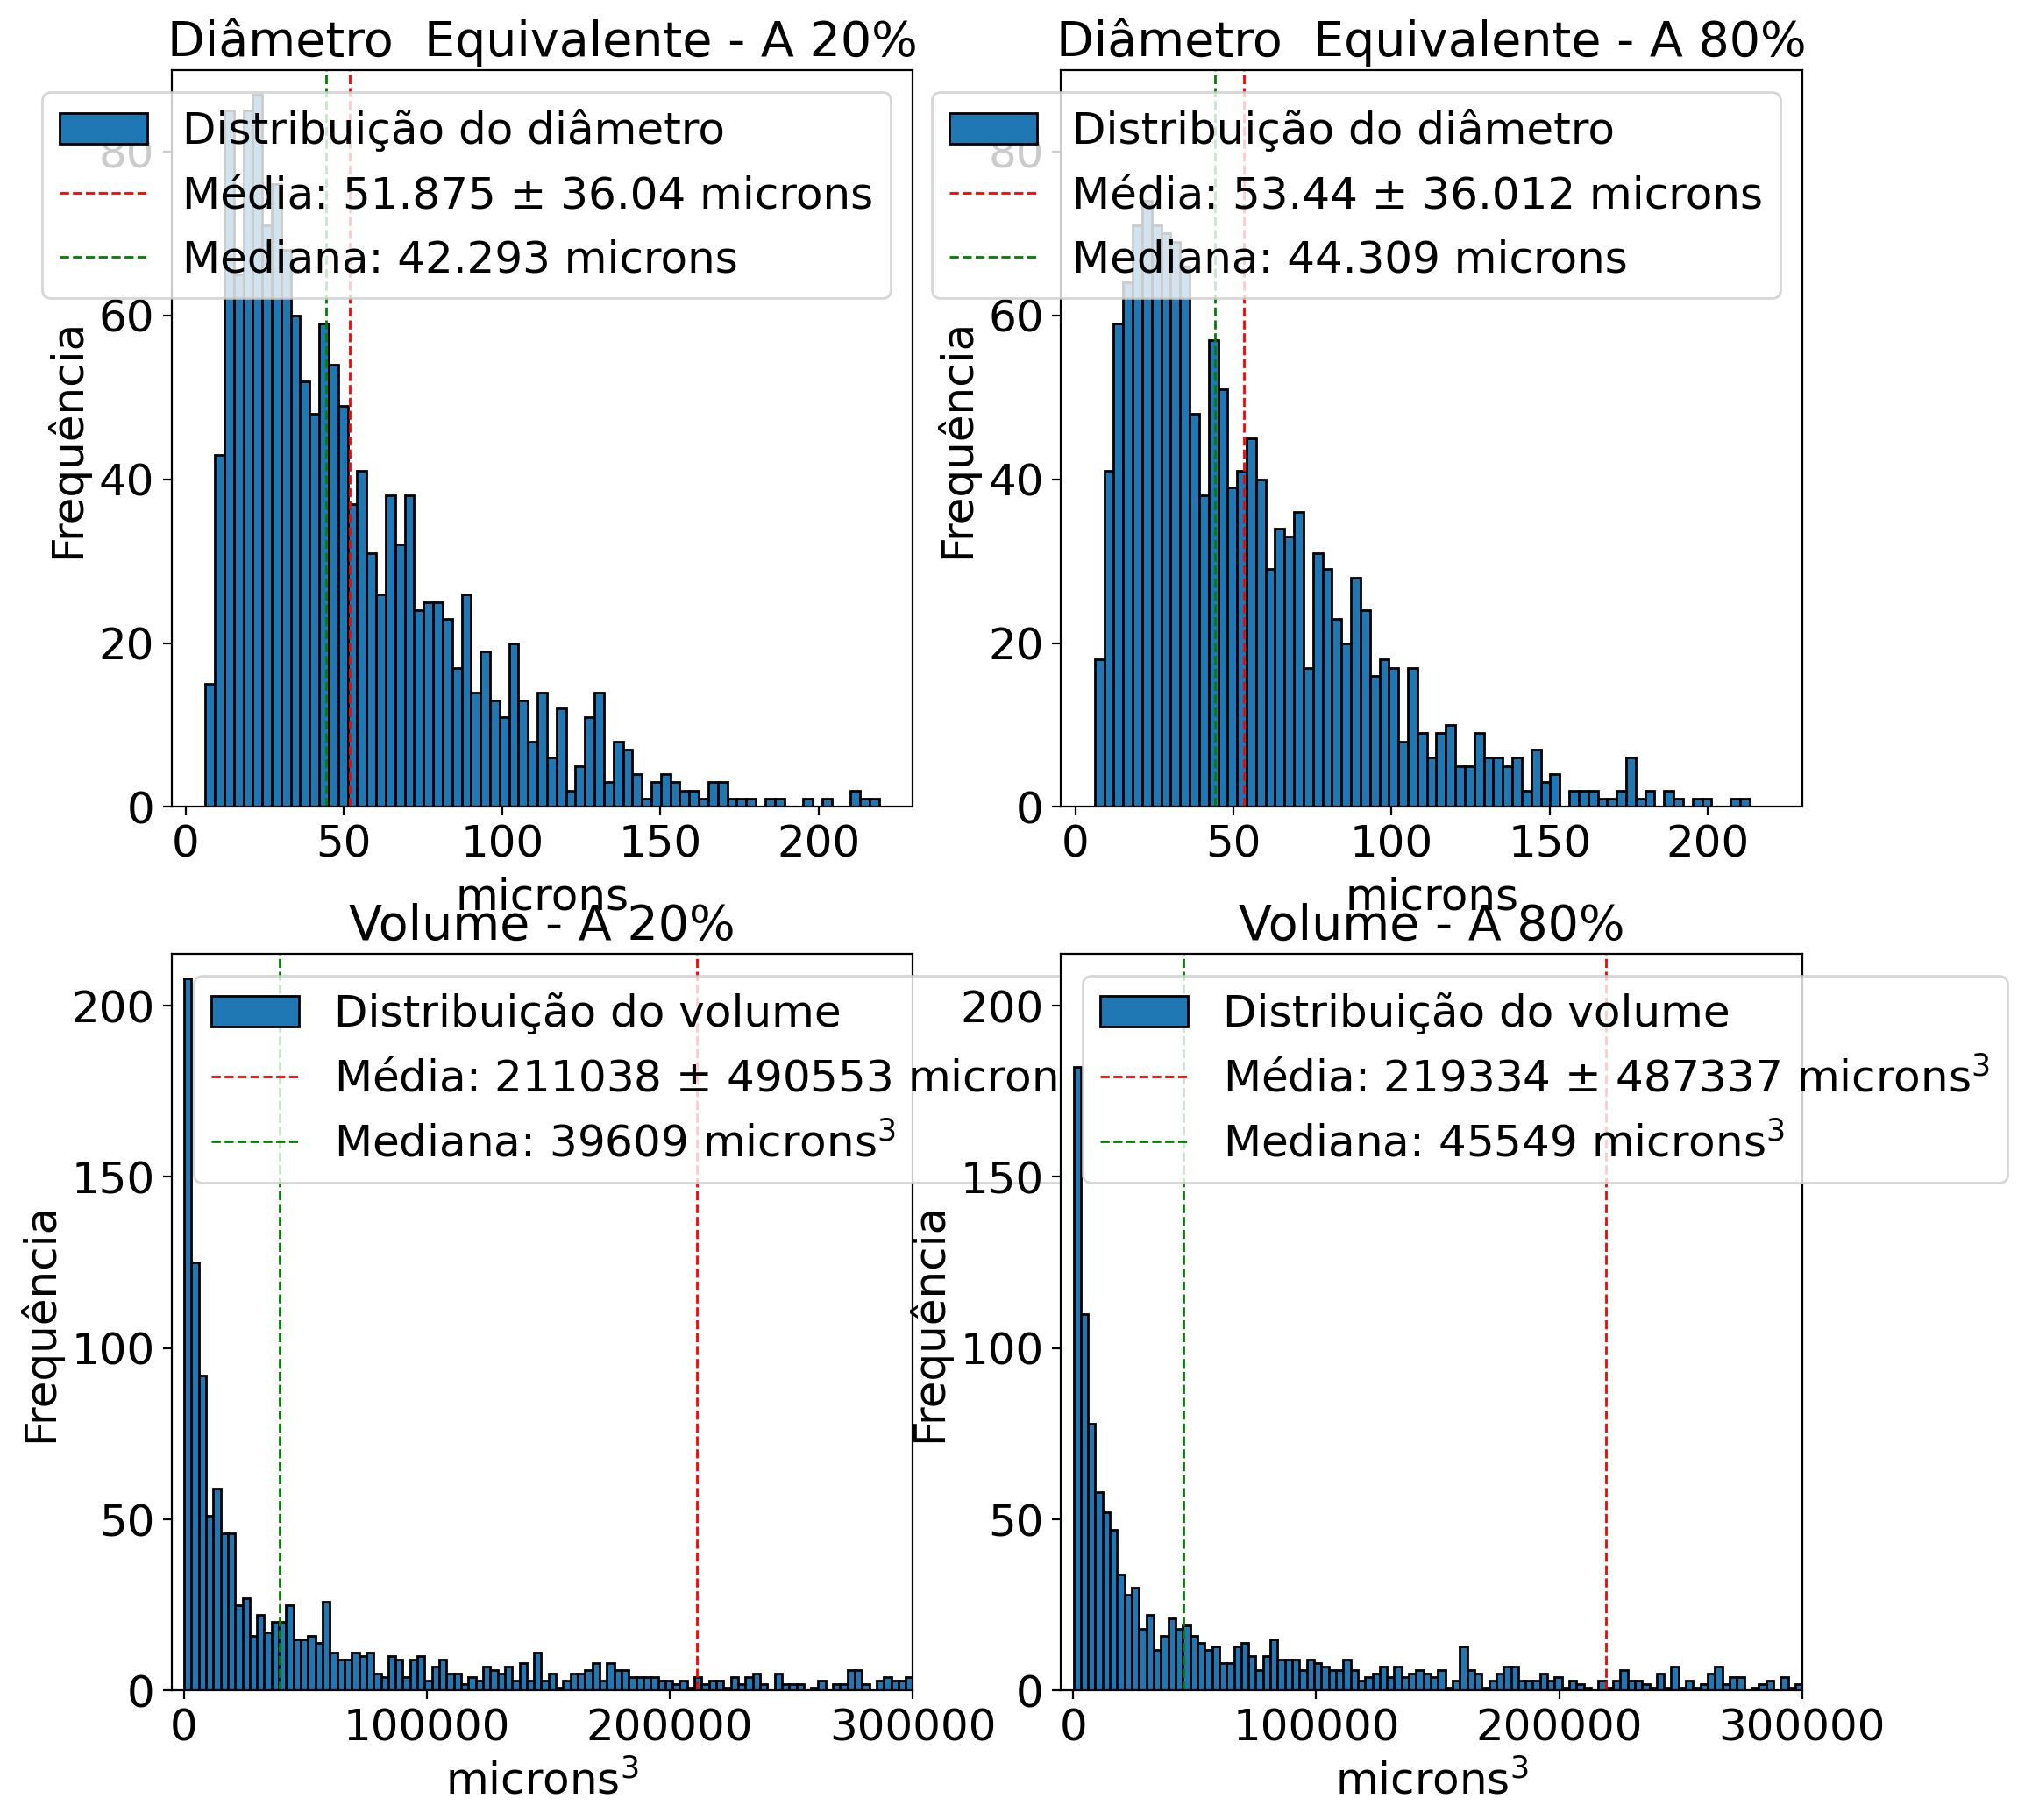

In [16]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), dpi=200)
ax[0,0].hist(df20_props_pA['equivalent_diameter_area']*voxel_size, edgecolor="k", bins=bins0, label = "Distribuição do diâmetro")
ax[0,0].axvline(diam_A20, color='red', linestyle='--', linewidth=1, label = f"Média: {round(diam_A20,3)} ± {round(diam_std_A20, 3)} microns")
ax[0,0].axvline(diam_med_A80, color='green', linestyle='--', linewidth=1, label = f"Mediana: {round(diam_med_A20,3)} microns")
#ax[0,0].axvspan(diam_AC20 - diam_std_AC20, diam_AC20 + diam_std_AC20, color='red',alpha=0.2)
ax[0,0].set_xlabel("microns", fontsize = 18)
ax[0,0].set_ylabel("Frequência", fontsize = 18)
ax[0,0].tick_params(axis='x', labelsize=18)
ax[0,0].tick_params(axis='y', labelsize=18)
ax[0,0].set_title("Diâmetro  Equivalente - A 20%", fontsize = 20)
ax[0,1].hist(df80_props_pA['equivalent_diameter_area']*voxel_size, edgecolor="k", bins=bins0, label = "Distribuição do diâmetro")
ax[0,1].axvline(diam_A80, color='red', linestyle='--', linewidth=1, label = f"Média: {round(diam_A80,3)} ± {round(diam_std_A80, 3)} microns")
ax[0,1].axvline(diam_med_A80, color='green', linestyle='--', linewidth=1, label = f"Mediana: {round(diam_med_A80,3)} microns")
#ax[0,1].axvspan(diam_AC80 - diam_std_AC80, diam_AC80 + diam_std_AC80, color='red',alpha=0.2)
ax[0,1].set_xlabel("microns", fontsize = 18)
ax[0,1].set_ylabel("Frequência", fontsize = 18)
ax[0,1].tick_params(axis='x', labelsize=18)
ax[0,1].tick_params(axis='y', labelsize=18)
ax[0,1].set_title("Diâmetro  Equivalente - A 80%", fontsize = 20)
ax[0,0].set_ylim(0, 89.9); ax[0,1].set_ylim(0, 89.9)

ax[1,0].hist(df20_props_pA['volume']*(voxel_size**3), edgecolor="k", bins=bins1, label = "Distribuição do volume")
ax[1,0].axvline(vol_A20, color='red', linestyle='--', linewidth=1, label = fr"Média: {round(vol_A20)} ± {round(vol_std_A20)} microns$^3$")
ax[1,0].axvline(vol_med_A20, color='green', linestyle='--', linewidth=1, label = fr"Mediana: {round(vol_med_A20)} microns$^3$")
#ax[1,0].axvspan(vol_AC20 - vol_std_AC20, vol_AC20 + vol_std_AC20, color='red',alpha=0.2)
ax[1,0].set_xlabel(r"microns$^3$", fontsize = 18)
ax[1,0].set_ylabel("Frequência", fontsize = 18)
ax[1,0].tick_params(axis='x', labelsize=18)
ax[1,0].tick_params(axis='y', labelsize=18)
ax[1,0].set_title("Volume - A 20%", fontsize = 20)
ax[1,1].hist(df80_props_pA['volume']*(voxel_size**3), edgecolor="k", bins=bins1, label = "Distribuição do volume")
ax[1,1].axvline(vol_A80, color='red', linestyle='--', linewidth=1, label = fr"Média: {round(vol_A80)} ± {round(vol_std_A80)} microns$^3$")
ax[1,1].axvline(vol_med_A80, color='green', linestyle='--', linewidth=1, label = fr"Mediana: {round(vol_med_A80)} microns$^3$")
#ax[1,1].axvspan(vol_AC80 - vol_std_AC80, vol_AC80 + vol_std_AC80, color='red',alpha=0.2)
ax[1,1].set_xlabel(r"microns$^3$", fontsize = 18)
ax[1,1].set_ylabel("Frequência", fontsize = 18)
ax[1,1].tick_params(axis='x', labelsize=18)
ax[1,1].tick_params(axis='y', labelsize=18)
ax[1,1].set_title("Volume - A 80%", fontsize = 20)
ax[1,0].set_xlim(-5000, 300000); ax[1,1].set_xlim(-5000, 300000)
ax[1,0].set_ylim(0, 215); ax[1,1].set_ylim(0, 215);

ax[0,0].legend(fontsize=18);ax[0,1].legend(fontsize=18);ax[1,0].legend(fontsize=18);ax[1,1].legend(fontsize=18);

# fig, ax = plt.subplots(2,2, figsize=(12, 12), dpi=200)
# ax[0,0].hist(df20_props_pA['equivalent_diameter_area']*voxel_size, edgecolor="k", bins=bins0)
# ax[0,0].set_xlabel("microns")
# ax[0,0].set_title("Diâmetro  Equivalente - A 20%")
# ax[0,1].hist(df80_props_pA['equivalent_diameter_area']*voxel_size, edgecolor="k", bins=bins0)
# ax[0,1].set_xlabel("microns")
# ax[0,1].set_title("Diâmetro  Equivalente - A 80%")
# ax[0,0].set_ylim(0, 95); ax[0,1].set_ylim(0, 95)

# ax[1,0].hist(df20_props_pA['volume']*(voxel_size**3), edgecolor="k", bins=bins1)
# ax[1,0].set_xlabel(r"microns$^3$")
# ax[1,0].set_title("Volume - A 20%")
# ax[1,1].hist(df80_props_pA['volume']*(voxel_size**3), edgecolor="k", bins=bins1)
# ax[1,1].set_xlabel(r"microns$^3$")
# ax[1,1].set_title("Volume - A 80%")
# ax[1,0].set_xlim(-1000, 300000); ax[1,1].set_xlim(-1000, 300000)
# #ax[1,0].set_ylim(0, 101); ax[1,1].set_ylim(0, 101);

fig.savefig("A_region_props.png")

In [17]:
logr = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
raio = 10**logr

freq = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]

# df20_thick_s["R"] = 10**df20_thick_s["LogR"]
# df80_thick_s["R"] = 10**df80_thick_s["LogR"]

# thk_AC20 = np.average(df20_thick_s["R"], weights=df20_thick_s["satn"])
# thk_std_AC20 = np.sqrt(np.average((df20_thick_s["R"] - thk_AC20)**2, weights=df20_thick_s["satn"]))
# thk_log_AC20 = np.log10(thk_AC20)

# thk_AC80 = np.average(df80_thick_s["R"], weights=df80_thick_s["satn"])
# thk_std_AC80 = np.sqrt(np.average((df80_thick_s["R"] - thk_AC80)**2, weights=df80_thick_s["satn"]))
# thk_log_AC80 = np.log10(thk_AC80)

(0.0, 0.73)

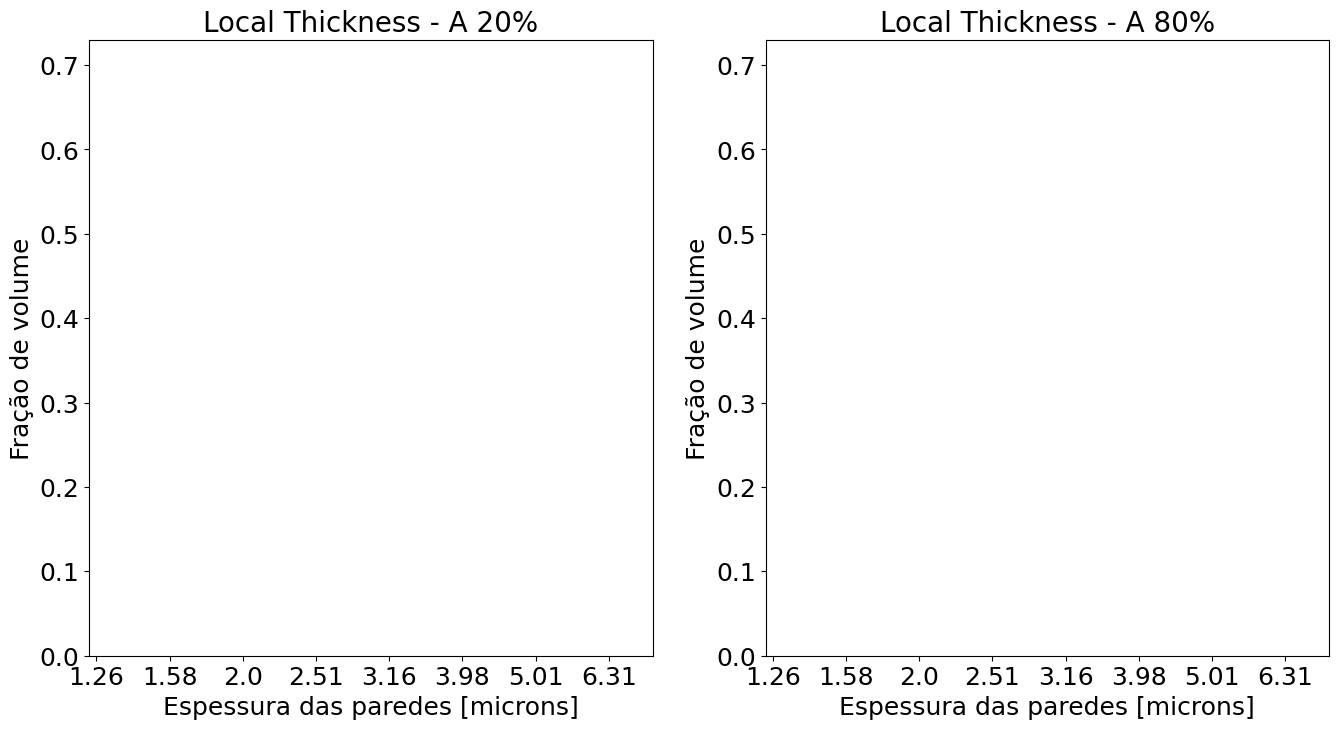

In [18]:
fig, ax = plt.subplots(1, 2, figsize=[16, 8])
ax[0].set_xticks(logr)
ax[0].set_xticklabels(raio.round(2), fontsize = 18)
ax[0].tick_params(axis='y', labelsize=18)
ax[0].set_title("Local Thickness - A 20%", fontsize = 20)
ax[0].set_xlabel('Espessura das paredes [microns]', fontsize = 18)
ax[0].set_ylabel('Fração de volume', fontsize = 18)
ax[0].set_xlim(0.09, 0.86)
ax[0].set_ylim(0, 0.73)
#ax[0].set_ylim(0, 3.05)
# ax[0].bar(x=df20_thick_s['LogR'], height=df20_thick_s["satn"], width=df20_thick_s.bin_widths, edgecolor='k', label="Distribuição da espessura")
# ax[0].axvline(thk_log_AC20, color='red', linestyle='--', linewidth=2, label = f"Média: {round(thk_AC20,3)} ± {round(thk_std_AC20, 3)} voxels")
# ax[0].axvspan(mean20_log - std20_log, mean20_log + std20_log, color='red',alpha=0.2)
# ax[0].legend(fontsize = 12);
ax[1].set_xticks(logr)
ax[1].set_xticklabels(raio.round(2), fontsize = 18)
ax[1].tick_params(axis='y', labelsize=18)
ax[1].set_title("Local Thickness - A 80%", fontsize = 20)
ax[1].set_xlabel('Espessura das paredes [microns]', fontsize = 18)
ax[1].set_ylabel('Fração de volume', fontsize = 18)
ax[1].set_xlim(0.09, 0.86)
ax[1].set_ylim(0, 0.73)
#ax[1].set_ylim(0, 3.05)
# ax[1].bar(x=df20_thick_s['LogR'], height=df20_thick_s["satn"], width=df80_thick_s.bin_widths, edgecolor='k', label="AC 80%")
# ax[1].axvline(thk_log_AC80, color='red', linestyle='--', linewidth=2, label = f"Média: {round(thk_AC80,3)} ± {round(thk_std_AC80, 3)} voxels")
# ax[1].axvspan(mean80_log - std80_log, mean80_log + std80_log, color='red',alpha=0.2)
# ax[1].legend(fontsize = 12);

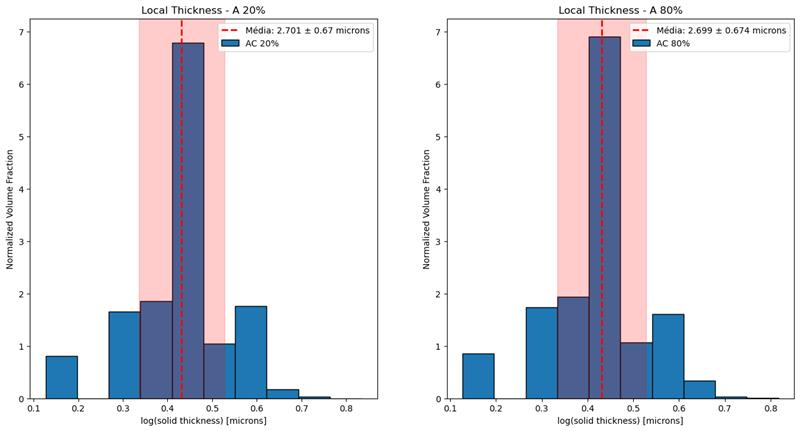